<a href="https://colab.research.google.com/github/0ginny/TIL/blob/main/240415_Neural_networks_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network for image classification

## Approach 1 - extract all the pixels

### Importing the libraries

In [1]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

### Extracting pixels from images

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Vision_AZ

/content/drive/MyDrive/Colab Notebooks/Vision_AZ


In [4]:
path = './Datasets/homer_bart_1.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r') # read mode
zip_object.extractall('./') # 추출, 위치 : 기본 위치.
zip_object.close

<bound method ZipFile.close of <zipfile.ZipFile filename='./Datasets/homer_bart_1.zip' mode='r'>>

In [ ]:
# but size 가 다름.

In [ ]:
directory = './homer_bart_1/'
# os.path.join은 경로를 연결해줘.
files = [os.path.join(directory, f) for f in os.listdir(directory)]
files

In [7]:
height, width = 128, 128

In [22]:
images = [] # file directory
classes = [] # label

In [ ]:
for image_path in files :

    try :
        image = cv2.imread(image_path)
        (H, W) = image.shape[:2] # 이미지의 가로 세로만 추출
    except:
        continue
    image = cv2.resize(image, (width, height))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2_imshow(image)
    # 백터로 변환
    image = image.ravel()
    images.append(image)

    image_name = os.path.basename(os.path.normpath(image_path))
    print(image_name)
    if image_name.startswith('b'):
        class_name = 0
    else :
        class_name = 1
    print(class_name)
    classes.append(class_name)

In [21]:
len(classes), len(classes)

(269, 269)

In [20]:
print(classes)

[1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]


In [24]:
# 딥러닝을 하기 위해 np로 만들어야해.

X = np.asarray(images)
y = np.asarray(classes)

In [25]:
X.shape, y.shape

((269, 16384), (269,))

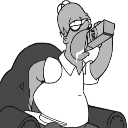

In [27]:
cv2_imshow(X[0].reshape(width,height))

In [29]:
y

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1])

In [30]:
np.unique(y, return_counts = True)

(array([0, 1]), array([160, 109]))

In [ ]:
sns.countplot(y)

### Normalizing the data

In [31]:
# 큰 값이면 처리 시간도 길고, 결과도 좋지  않아.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Train and test set

In [32]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 1)

In [36]:
X_train.shape, y_train.shape

((215, 16384), (215,))

### Building and training the neural network

In [50]:
X_train.shape[1]

16384

In [52]:
# 최적 은닉 노드 수?? input_shape + 2 /2
unit_num = (X_train.shape[1] + 2) / 2

In [53]:
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape = (X_train.shape[1],),
                                   units = unit_num,
                                   activation = 'relu'))
network1.add(tf.keras.layers.Dense(units = unit_num, activation = 'relu'))
network1.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [54]:
network1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8193)              134242305 
                                                                 
 dense_13 (Dense)            (None, 8193)              67133442  
                                                                 
 dense_14 (Dense)            (None, 1)                 8194      
                                                                 
Total params: 201383941 (768.22 MB)
Trainable params: 201383941 (768.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
network1.compile(optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

In [56]:
history = network1.fit(X_train,y_train, epochs = 50)

Epoch 1/50
7/7 [==============================] - 31s 4s/step - loss: 155.1152 - accuracy: 0.5209
Epoch 2/50
7/7 [==============================] - 28s 4s/step - loss: 6.9903 - accuracy: 0.5256
Epoch 3/50
7/7 [==============================] - 28s 4s/step - loss: 1.3928 - accuracy: 0.4884
Epoch 4/50
7/7 [==============================] - 28s 4s/step - loss: 0.7284 - accuracy: 0.5442
Epoch 5/50
7/7 [==============================] - 28s 4s/step - loss: 0.6802 - accuracy: 0.6000
Epoch 6/50
7/7 [==============================] - 27s 4s/step - loss: 0.6452 - accuracy: 0.6279
Epoch 7/50
7/7 [==============================] - 27s 4s/step - loss: 0.6123 - accuracy: 0.7023
Epoch 8/50
7/7 [==============================] - 28s 4s/step - loss: 0.6298 - accuracy: 0.6279
Epoch 9/50
7/7 [==============================] - 28s 4s/step - loss: 0.6531 - accuracy: 0.5814
Epoch 10/50
7/7 [==============================] - 42s 6s/step - loss: 0.6694 - accuracy: 0.6791
Epoch 11/50
7/7 [====================

### Evaluating the neural network

In [57]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

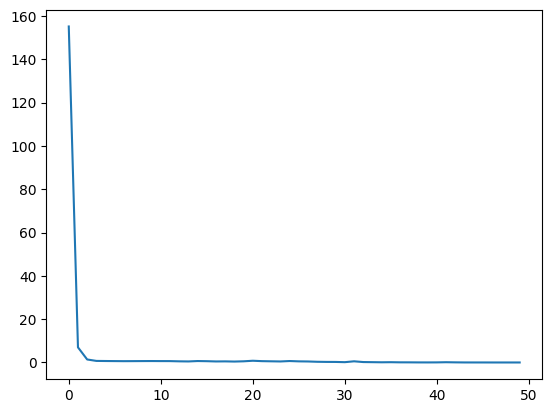

In [58]:
plt.plot(history.history['loss']) # 이걸로 어느정도 epoch의 수를 알 수 있어

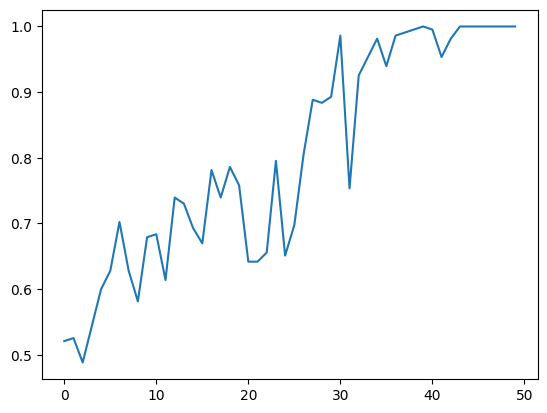

In [59]:
plt.plot(history.history['accuracy'])


In [60]:
predictions = network1.predict(X_test)

2/2 [==============================] - 1s 318ms/step


In [61]:
predictions = (predictions > 0.5 ) # 0.5보다 크면 호머, 작으면 바드

In [65]:
y_test.shape, predictions.shape

((54,), (54, 1))

In [69]:
chk = np.concatenate([y_test.reshape(-1,1), predictions], axis =1)

In [ ]:
chk

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.6481481481481481

In [72]:
# 오차 행렬
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)

<Axes: >

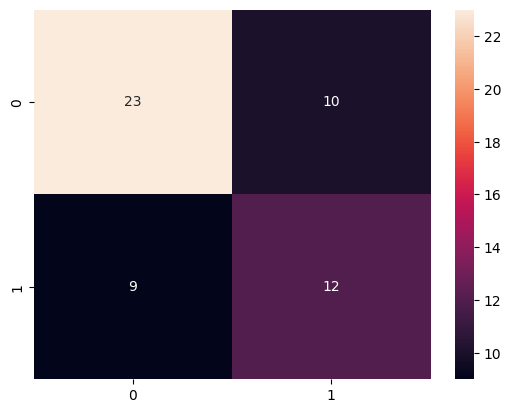

In [73]:
sns.heatmap(cm, annot = True)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        33
           1       0.55      0.57      0.56        21

    accuracy                           0.65        54
   macro avg       0.63      0.63      0.63        54
weighted avg       0.65      0.65      0.65        54



### Saving and loading the network

In [76]:
model_json = network1.to_json() # json으로 모델 저장
with open('network1.json', 'w') as json_file:
    json_file.write(model_json)

In [77]:
from keras.models import save_model
network1_saved = save_model(network1, 'weights1.hdf5') # 가중치 저장

<ipython-input-77-e75b44872fef>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network1_saved = save_model(network1, 'weights1.hdf5') # 가중치 저장


In [78]:
# load
with open('network1.json') as json_file:
    json_saved_model = json_file.read()
    json_saved_model

In [79]:
network1_loaded = tf.keras.models.model_from_json(json_saved_model)
network1_loaded.load_weights('weights1.hdf5')
network1_loaded.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#근데 피클이 훨씬 쉽긴 하다.
import pickle

### Classifying one single image

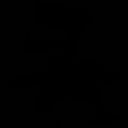

In [94]:
test_image = X_test[20]
cv2_imshow(test_image.reshape(width, height))

In [95]:
test_image = scaler.inverse_transform(test_image.reshape(1,-1))


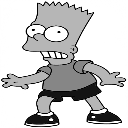

In [96]:
cv2_imshow(test_image.reshape(width,height))

In [97]:
network1_loaded.predict(test_image)[0][0]

1/1 [==============================] - 0s 163ms/step


0.0

In [99]:
if network1_loaded.predict(test_image)[0][0] < 0.5:
    print('Bart')
else :
    print('Homer')

1/1 [==============================] - 0s 170ms/step
Bart


## Approach 2 - feature extraction

이 방법은 너무 비효율적이긴해. 형상이 매우 단순하면 용량의 감소를 위해서 가능할 수도 있겠다.

### Feature extractor

In [100]:
files = [os.path.join(directory,f) for f in sorted(os.listdir(directory))]
print(files)

['./homer_bart_1/.DS_Store', './homer_bart_1/bart1.bmp', './homer_bart_1/bart10.bmp', './homer_bart_1/bart100.bmp', './homer_bart_1/bart101.bmp', './homer_bart_1/bart102.bmp', './homer_bart_1/bart103.bmp', './homer_bart_1/bart104.bmp', './homer_bart_1/bart105.bmp', './homer_bart_1/bart106.bmp', './homer_bart_1/bart108.bmp', './homer_bart_1/bart109.bmp', './homer_bart_1/bart11.bmp', './homer_bart_1/bart110.bmp', './homer_bart_1/bart111.bmp', './homer_bart_1/bart112.bmp', './homer_bart_1/bart113.bmp', './homer_bart_1/bart114.bmp', './homer_bart_1/bart115.bmp', './homer_bart_1/bart116.bmp', './homer_bart_1/bart117.bmp', './homer_bart_1/bart118.bmp', './homer_bart_1/bart119.bmp', './homer_bart_1/bart12.bmp', './homer_bart_1/bart120.bmp', './homer_bart_1/bart121.bmp', './homer_bart_1/bart122.bmp', './homer_bart_1/bart123.bmp', './homer_bart_1/bart124.bmp', './homer_bart_1/bart125.bmp', './homer_bart_1/bart126.bmp', './homer_bart_1/bart127.bmp', './homer_bart_1/bart128.bmp', './homer_bart_1/

In [101]:
# 특성 지정 (파일의 해더)
export = 'mouth,pants,shoes,tshirt,shorts,sneakers,class/n'

In [102]:
show_images = True
features = []

In [103]:
for image_path in files:
    # extrackt color
    try :
        original_image = cv2.imread(image_path)
        (H, W) = original_image.shape[:2]
    except :
        continue
    image = original_image.copy()
    image_features = []
    mounth = pants= shoes = 0
    tshirt = shorts = sneakers = 0

    image_name = os.path.basename(os.path.normpath(image_path))

    if image_name.startswitch('b'):
        class_name = 0
    else :
        class_name = 1

    for height in range(0,H):
        for width in range(0,W):
            # BGR channel
            blue = imagem.item(height, width, 0)
            green = imagem.item(height, width, 1)
            red = imagem.item(height, width, 2)

            #Homer - brown mouth
            if (blue >= 95 and blue <= 140) and (green >= 160 and green <= 185) and (175 <= red <= 200):
                image[height, width] = [0, 255, 255]
                mouth += 1

SyntaxError: invalid syntax (<ipython-input-103-847bd2ff6e11>, line 10)

### Train and test sets

### Building and training the neural network

### Evaluating the neural network

### Saving, loading and classifying one single image